# The mode is in its best possible configuration
## Please don't change anything, before asking Rishit

## The test set accuracy is: 94.74%

In [1292]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# from keras import backend as K

import numpy as np
import pandas as pd

import os

import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df_train = pd.read_csv("train_split.csv")
df_valid = pd.read_csv("valid_split.csv")
df_test = pd.read_csv("test_split.csv")

# df.Education.replace(np.NaN, 5, inplace=True)
# df.Residence.fillna(df.Residence.mode()[0], inplace=True)
# df["Delivery phase"].fillna(df["Delivery phase"].mode()[0], inplace=True)
# df["Age"].fillna(df["Age"].median(axis=0), inplace=True)
# df["Weight"].fillna(df["Weight"].mean(axis=0), inplace=True)
# df["HB"].fillna(df["HB"].mean(axis=0), inplace=True)
# df["BP"].fillna(df["BP"].mean(axis=0), inplace=True)
# print(df)


In [1293]:
# df.groupby('Result').count()

In [1294]:
# def sampling_k_elements(group, k=24):
#     if len(group) < k:
#         return group
#     return group.sample(k)

# balanced1 = df.loc[df['Result'] == 0].groupby('Result').apply(sampling_k_elements, 24).reset_index(drop=True)
# balanced2 = df.loc[df['Result'] == 1].groupby('Result').apply(sampling_k_elements, 36).reset_index(drop=True)
# balanced = pd.concat([balanced2, balanced1])
# balanced.head()

In [1295]:
# df = balanced
# balanced.shape # (rows, columns)

In [1296]:
# data = []


# for i in range(len(df)):
#     data.append({
#             # "evidence": [int(df.iloc[i,0]), int(df.iloc[i,1]), int(df.iloc[i,2]), int(df.iloc[i,3]), float(df.iloc[i,4]), int(df.iloc[i,5]), float(df.iloc[i, 6]), int(df.iloc[i,7]), int(df.iloc[i, 8])],
#             "evidence": [int(df.iloc[i,0]), int(df.iloc[i,1]), float(df.iloc[i,2]), int(df.iloc[i,3]), float(df.iloc[i,4]), int(df.iloc[i,5]), float(df.iloc[i, 6]), int(df.iloc[i, 8])],
#             "label": int(df.iloc[i,9])
#         })

In [1297]:
# ax1 = df.plot.scatter(x='Result',
#                       y='Delivery phase',  # 'Age' 'Community' 'Delivery phase' 'Weight' 'HB' 'IFA' 'BP'
#                       c='DarkBlue')

In [1298]:
# df['Community'].unique()  # df['Delivery phase'].unique()

In [1299]:
# df.loc[df['Delivery phase'] == 1].groupby('Result').count()

In [1300]:
# df.loc[df['Delivery phase'] == 2].groupby('Result').count()

In [1301]:
# df.loc[df['Community'] == 4].groupby('Result').count()

In [1302]:
# data

In [1303]:
# # Separate data into training and testing groups

# evidence = [row["evidence"] for row in data]
# labels = [row["label"] for row in data]
# X_training, X_testing, y_training, y_testing = train_test_split(
#     evidence, labels, test_size=0.25, random_state=42, stratify=labels
# )

In [1304]:
# sum([1 for x in y_training if x == 1]), sum([1 for x in y_training if x == 0])

In [1305]:
TARGET_COL_NAMES = ["Result_0.0", "Result_1.0"]

In [1306]:
# Split features and target
X_train = df_train.drop(columns=TARGET_COL_NAMES)
X_valid = df_valid.drop(columns=TARGET_COL_NAMES)
y_train = df_train[TARGET_COL_NAMES]
y_valid = df_valid[TARGET_COL_NAMES]

X_test = df_test.drop(columns=TARGET_COL_NAMES)
y_test = df_test[TARGET_COL_NAMES]


In [1307]:
COL_COUNT_INDEX = 1
NO_OF_TARGET_COLS = 2  # Just meta-data from devs

NO_OF_INPUT_COLS = X_train.shape[COL_COUNT_INDEX]

In [1308]:
# All the below values were got using Adam optimizer

# Batch size = 48, dropout=0.1,
# 6, 3, 2 -> Minimum validation loss: 0.3162044286727905
# 8, 4, 2 -> Minimum validation loss: 0.3133411705493927
# 12, 6, 2 -> Minimum validation loss: 0.32757410407066345
# 8, 6, 2 -> Minimum validation loss: 0.31015336513519287

# Batch size = 52, dropout=0.1,
# 8, 6, 2 -> Minimum validation loss: 0.317778080701828
# 6, 3, 2 -> Minimum validation loss: 0.3258116543292999
# 12, 6, 2 -> Minimum validation loss: 0.33144840598106384

# Batch size = 48, no dropouts and only batchnormalization
# 8, 6, 2 -> Minimum validation loss: 0.2923494279384613

# Batch size = 48, Batchnormalization before first layer
# 8, 6, 2 -> Minimum validation loss: 0.29846498370170593

# Batch size = 48, Xavier and He, dropout=0.1, 
# 8, 6, 2 -> Best setup till now; Minimum validation loss: 0.28807809948921204

# Batch size = 48, Xavier and He, dropout_1_layer = 0.1, dropout_2_layer = 0.3
# 8, 6, 2 -> Minimum validation loss: 0.29950150847435

# Batch size = 48, Xavier and He, dropout_1_layer = 0.3, dropout_2_layer = 0.3
# 8, 6, 2 -> Minimum validation loss: 0.3288656771183014

# Batch size = 48, Xavier and He, dropout_1_layer = 0.2, dropout_2_layer = 0.2
# 8, 6, 2 -> Minimum validation loss: 0.319835901260376

# All the above usiing Xavier using GlorotNormal initialization
# GlorotUniform seems to be very much the same


In [1309]:
# Create a neural network
model = keras.Sequential([

    # tf.keras.layers.Dense(10, input_shape=(9,)),
    # tf.keras.layers.LeakyReLU(alpha=0.1),
    # tf.keras.layers.Dropout(0.25),

    # tf.keras.layers.Dense(5, input_shape=(16,)),
    # tf.keras.layers.LeakyReLU(alpha=0.1),
    # tf.keras.layers.Dropout(0.25),

    # layers.BatchNormalization(input_shape=[NO_OF_INPUT_COLS]),

    # the hidden ReLU layers
    layers.Dense(units=8, name="hidden_layer_1", kernel_initializer=tf.keras.initializers.GlorotNormal(seed=42), input_shape=[NO_OF_INPUT_COLS]),  # activation="relu",
    layers.Activation("relu"),
    layers.Dropout(rate=0.1),
    # layers.BatchNormalization(),
    layers.Dense(units=6, name="hidden_layer_2", kernel_initializer=tf.keras.initializers.GlorotNormal(seed=42)),  # activation="relu",
    layers.Activation("relu"),
    layers.Dropout(rate=0.1),
    # layers.BatchNormalization(),
  
    # the softmax output layer 
    layers.Dense(units=2, name="output_layer", kernel_initializer=tf.keras.initializers.GlorotNormal(seed=42)),  # activation="softmax",
    layers.Activation("softmax")
])

In [1310]:
# Specifying the loss function and the optimizer function for the neural network
model.compile(
    optimizer= "adam",
    loss="binary_crossentropy",
    metrics=['binary_accuracy'],
)

In [1311]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=100, # how many epochs to wait before stopping, if no improvement greater than or equal to the threashold is found
    restore_best_weights=True,
)

In [1312]:
history = model.fit(
                    X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    batch_size=48,
                    epochs=10000,
                    callbacks=[early_stopping], # put your callbacks in a list
                )

Epoch 1/10000
2/2 [==============================] - 0s 86ms/step - loss: 0.7398 - binary_accuracy: 0.2462 - val_loss: 0.7127 - val_binary_accuracy: 0.3333
Epoch 2/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7275 - binary_accuracy: 0.3538 - val_loss: 0.7098 - val_binary_accuracy: 0.3333
Epoch 3/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7230 - binary_accuracy: 0.2615 - val_loss: 0.7070 - val_binary_accuracy: 0.3333
Epoch 4/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7282 - binary_accuracy: 0.2462 - val_loss: 0.7043 - val_binary_accuracy: 0.2500
Epoch 5/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7159 - binary_accuracy: 0.3077 - val_loss: 0.7017 - val_binary_accuracy: 0.0833
Epoch 6/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7098 - binary_accuracy: 0.2615 - val_loss: 0.6991 - val_binary_accuracy: 0.3333
Epoch 7/10000
2/2 [==============================] - 0s 11ms/ste

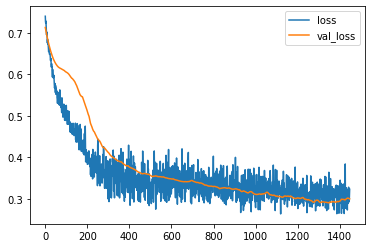

In [1313]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df[['loss', 'val_loss']].plot()

In [1314]:
print("Minimum training loss: {}".format(history_df['loss'].min()))

Minimum training loss: 0.26364001631736755


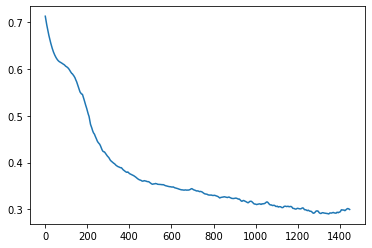

In [1315]:
history_df['val_loss'].plot()

In [1316]:
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Minimum validation loss: 0.2902813255786896


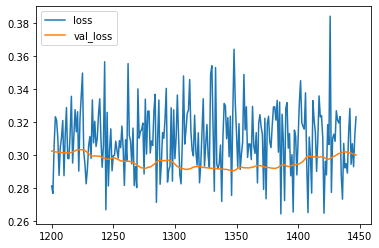

In [1317]:
history_df.loc[1200:, ['loss', 'val_loss']].plot()

In [1318]:
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

Best Validation Loss: 0.2903
Best Validation Accuracy: 0.9167


In [1319]:
loss_val, accuracy = model.evaluate(X_test, y_test)
print('Accuracy on test set: %.2f' % (accuracy*100))
print('Loss on test set: %.2f' % (loss_val * 100))

1/1 [==============================] - 0s 5ms/step - loss: 0.2403 - binary_accuracy: 0.9474
Accuracy on test set: 94.74
Loss on test set: 24.03


In [1320]:
# # Define our custom loss function
# def focal_loss(y_true, y_pred):
#     gamma = 2
#     alpha = 0.1
#     pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
#     pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
#     return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))

# # Compile our model
# adam = tf.keras.optimizers.Adam(lr=0.1)
# model.compile(loss=[focal_loss], metrics=["accuracy"], optimizer=adam) 

In [1321]:
# opt = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# # opt = tf.keras.optimizers.Adam(learning_rate=0.05)

# # Train neural network
# model.compile(
#     optimizer= opt,
#     loss="binary_crossentropy",
#     metrics=["accuracy"]
# )

In [1322]:
# Evaluate how well model performs
# model.evaluate(X_testing, y_testing, verbose=2)

In [1323]:
# ynew = model.predict_classes(X_testing)

In [1324]:
# ynew

In [1325]:
# y_testing

In [1326]:
# tf.math.confusion_matrix(y_testing, ynew, 2)

In [1330]:
a = tf.argmax(y_test, axis = 1)
b = tf.argmax(model.predict(X_test), axis=1)
tf.math.confusion_matrix(a, b, 2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 5,  1],
       [ 0, 13]], dtype=int32)>

In [1332]:
a

<tf.Tensor: shape=(19,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>

In [1331]:
b

<tf.Tensor: shape=(19,), dtype=int64, numpy=array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>